<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/18Apr20_Working%20with%20Missing%20Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Missing Values

### Introduction

One of the requirements of linear regression is that each of the inputs is translated into a number before we begin to fit the model to our data.  A problem with that, is that oftentimes some of the data may simply not be available.  In those cases, which occur quite often, we still would like to include the feature, and see how data being missing can still be informative. 

### Working with NYC SAT data

For this lesson, let's keep explore the average SAT scores for New York City Public Schools.  First, of course we'll load up the data.  [Click here](https://www.kaggle.com/nycopendata/high-schools#scores.csv) to view the data.  Ok, let's take a look.

In [0]:
import pandas as pd
url ="https://raw.githubusercontent.com/jigsawlabs-student/feature-engineering/master/1-detecting-missing-data-reading/scores.csv"
df = pd.read_csv(url)
df.columns

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested'],
      dtype='object')

Working with columns with spaces isn't a lot of fun in pandas, so let's replace the columns with underscores.

In [0]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [0]:
df.columns

Index(['school_id', 'school_name', 'borough', 'building_code',
       'street_address', 'city', 'state', 'zip_code', 'latitude', 'longitude',
       'phone_number', 'start_time', 'end_time', 'student_enrollment',
       'percent_white', 'percent_black', 'percent_hispanic', 'percent_asian',
       'average_score_sat_math', 'average_score_sat_reading',
       'average_score_sat_writing', 'percent_tested'],
      dtype='object')

Ok, much better.  Now our goal here is to find the attributes that are associated with higher math SAT scores.  So, we'll set higher math SAT scores as our target variable.  

This is one of those datasets where we have missing values. 

In [0]:
df.percent_tested[:3]

0      NaN
1      NaN
2    91.0%
Name: percent_tested, dtype: object

Above it's pretty obvious.  We simply look for the places that list NaN, which stands for not a number.  However, we should also check to ensure that the missing values are included in less obvious ways.

### Discovering Missing Values

Missing values can show up in various forms. We can also detect them by looking for the following:

* NAN - which stands for not a number
* -999 or 999 - an outlier number to indicate there is no associated data
* Another number, like the mean that repeats more than expected
* '' - an empty string


Let's see techniques for discovering these in our dataset.

#### NAN

Pandas provides with some the `is_na` method for seeing if a value is not available.  We can use it by passing through the pandas series that we wish to examine. 

In [0]:
pd.isna(df.average_score_sat_math)[0:5]

0     True
1     True
2    False
3    False
4    False
Name: average_score_sat_math, dtype: bool

So the `isna` method returns a series of true or false values.  Let's see how many True values, that is not available values, are in the series.

In [0]:
pd.isna(df.average_score_sat_math).value_counts()

False    375
True      60
Name: average_score_sat_math, dtype: int64

So roughly 14 percent of our target variables have NAN.

### Missing numbers as outliers

Just because we saw some `nan`s listed doesn't signify that we're done.  Our missing numbers could also be disguised as outliers.  This happens because the person entering the data may be forced to enter a number, but does not know which number to enter.  So they choose a number that they know will not occur, like -999. Unfortunately, we do not know which number is used to indicate a missing value.  

If we use a histogram, to plot our series, we can discover if there is anything out of the norm.

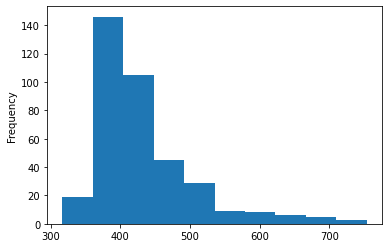

In [0]:
df.average_score_sat_math.plot.hist()

Here, our numbers look good - they range between a little over 300 and below 800.  Let's make sure no values are cut off in our plot by checking the min and max values.

In [0]:
df.average_score_sat_math.min()

317.0

In [0]:
df.average_score_sat_math.max()

754.0

Ok, so it looks like we do not have any outlier values or spikes in the data to indicate missing values.

### Empty Strings

This is easy enough to check.  With a column that is an float, we can be confident that there are no empty strings.

In [0]:
df.average_score_sat_math.dtype

dtype('float64')

We can't have empty strings in a column of type float.  So, by way of example, let's take a look at the phone number column. This feature is filled with strings.

In [0]:
df.phone_number[0]

'212-695-9114'

In [0]:
(df.phone_number == '212-695-9114')[0:4]

0     True
1    False
2    False
3    False
Name: phone_number, dtype: bool

In [0]:
(df.phone_number == ' ').value_counts()

False    435
Name: phone_number, dtype: int64

To check missing values across columns, we can use the `eq` `any` methods in pandas.

In [0]:
df[df.eq(' ').any(axis = 1)]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,school_id,school_name,borough,building_code,street_address,city,state,zip_code,latitude,longitude,phone_number,start_time,end_time,student_enrollment,percent_white,percent_black,percent_hispanic,percent_asian,average_score_sat_math,average_score_sat_reading,average_score_sat_writing,percent_tested


> So here we do not see any empty string values in the dataframe.

Just to see the functionality working, let's look for the value `'212-695-9114'` across our dataframe.

In [0]:
import numpy as np
df[df.eq('212-695-9114').any(axis = 1)]

,school_id,school_name,borough,building_code,street_address,city,state,zip_code,latitude,longitude,...,end_time,student_enrollment,percent_white,percent_black,percent_hispanic,percent_asian,average_score_sat_math,average_score_sat_reading,average_score_sat_writing,percent_tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.shape

(435, 22)

### Summary

In this lesson, we saw some techniques for discovering missing data.  We can see it via NaN's listed, via outlier data, or spikes in our dataset, like a repeating mean.  We saw how in textual data, missing data may show up as empty strings.  In the next lesson, we'll see how to handle missing data when we find it.